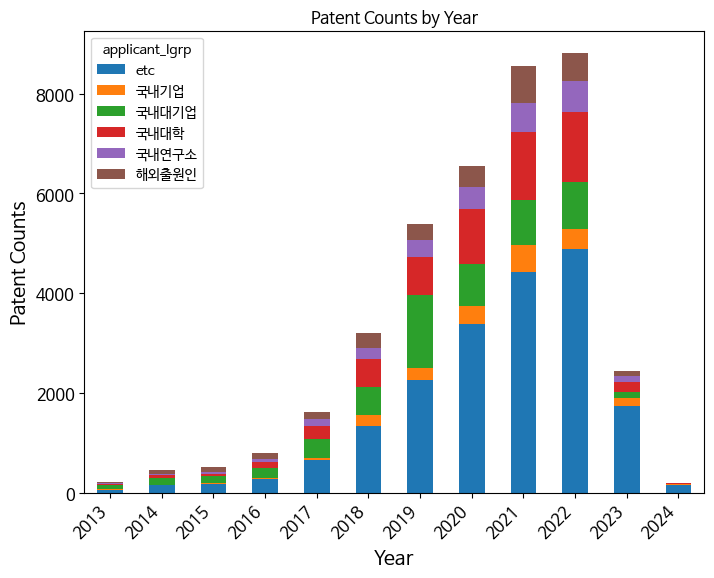

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
from datetime import date
import mpld3

current_directory = os.getcwd()
font_path = os.path.join(current_directory, 'NanumBarunGothic.ttf')

if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc("font", family=font_prop.get_name())
    plt.rcParams['axes.unicode_minus'] = False


filtered_df_patents = pd.read_excel('result_mod_30June2024.xlsx')

filtered_df_patents['application_date'] = pd.to_datetime(filtered_df_patents['application_date'], errors='coerce')


filtered_df_patents = filtered_df_patents.rename(columns={
                'status': 'Status',
                'title': 'Title',
                'ap_num': 'Application Number',
                'application_date': 'Application Date',
                'applicant': 'Applicant'
            })




 # 플롯 데이터를 준비
filtered_df_patents['application_year'] = filtered_df_patents['Application Date'].dt.year
filtered_counts = filtered_df_patents.groupby(['application_year', 'applicant_lgrp']).size().unstack(fill_value=0)

years = list(filtered_counts.index)
fig, ax = plt.subplots(figsize=(8, 6))
filtered_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Patent Counts by Year')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Patent Counts', fontsize=14)
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years, rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12)
plot_html = mpld3.fig_to_html(fig)
# plt.close(fig)

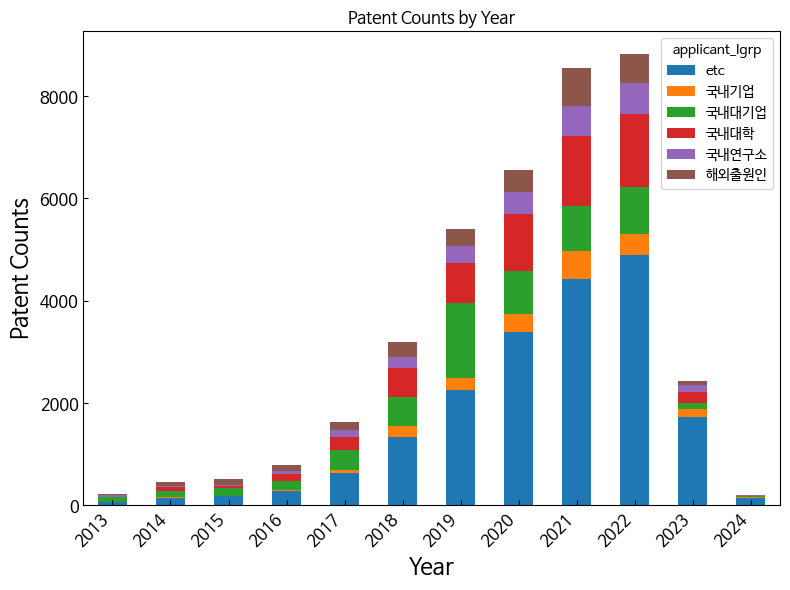

In [6]:

fig, ax = plt.subplots(figsize=(8, 6))
filtered_counts.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Patent Counts by Year')
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Patent Counts', fontsize=16)
ax.set_xticks(range(len(filtered_counts.index)))
ax.set_xticklabels(filtered_counts.index, rotation=45, ha='right', fontsize=12)
ax.tick_params(axis='y', labelsize=12, direction='in')
ax.tick_params(axis='x', labelsize=12, direction='in')
plt.tight_layout()